In [1]:
import networkx as nx

import pymysql
import getpass
import pandas as pd

In [2]:
p = getpass.getpass()

········


Acho que vale a pena deixar o modelo do banco para termos as conexões em mente

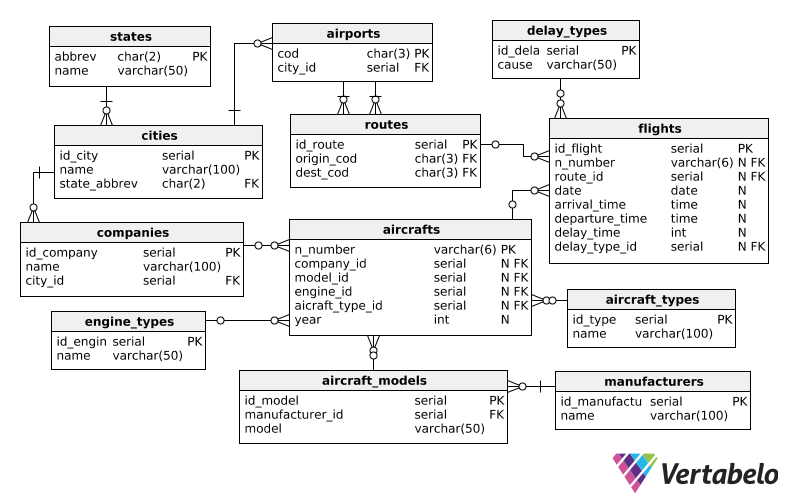

Quantidade de aeronaves por Companhia

In [3]:
conn = pymysql.connect(host = 'localhost',
                       user = 'root', 
                       passwd = p, 
                       database = 'usa_flights')

cur = conn.cursor()

In [4]:
query = '''
SELECT companies.name AS Company,
       Count(Companys_id) AS Aircrafts
FROM aircrafts
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY Companys_id
ORDER BY Aircrafts DESC;
'''

pd.read_sql_query(query, conn)

,Company,Aircrafts
0,DELTA AIR LINES INC,882
1,UNITED AIRLINES INC,856
2,AMERICAN AIRLINES INC,834
3,WELLS FARGO BANK NA TRUSTEE,802
4,SOUTHWEST AIRLINES INC,607
5,SKY WEST AIRLINES INC,442
6,WILMINGTON TRUST CO TRUSTEE,230
7,BANK OF UTAH TRUSTEE,206
8,JETBLUE AIRWAYS CORPORATION,199
9,ALASKA AIRLINES INC,164


Quantidade de voos por Companhia e Aeronave em cada Rota

In [5]:
query = '''
SELECT companies.name AS Companny,
       aircrafts.N_Number AS Aircraft, 
       routes.Departure_Airport_id AS Departure, 
       routes.Arrival_Airport_id AS Arrival,
       COUNT(aircrafts.N_Number) AS Flights
FROM flights
INNER JOIN aircrafts ON aircrafts.n_number = flights.Aircrafts_id
INNER JOIN routes ON flights.Route_id = routes.id_route
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY companies.name, aircrafts.N_Number, routes.Departure_Airport_id, routes.Arrival_Airport_id
;
'''

pd.read_sql_query(query, conn)

,Companny,Aircraft,Departure,Arrival,Flights
0,200 SOUTH AVENUE LLC,N975JB,MCO,BOS,6
1,200 SOUTH AVENUE LLC,N975JB,BOS,MCO,6
2,200 SOUTH AVENUE LLC,N975JB,BQN,MCO,3
3,200 SOUTH AVENUE LLC,N975JB,JFK,SJU,4
4,200 SOUTH AVENUE LLC,N975JB,SJU,JFK,3
5,200 SOUTH AVENUE LLC,N975JB,JFK,LAS,1
6,200 SOUTH AVENUE LLC,N975JB,LAS,JFK,1
7,200 SOUTH AVENUE LLC,N975JB,JFK,PBI,1
8,200 SOUTH AVENUE LLC,N975JB,PBI,JFK,1
9,200 SOUTH AVENUE LLC,N975JB,JFK,FLL,4


Quantidade de voos que partiram de cada aeroporto por Companhia

In [6]:
query = '''
SELECT companies.name AS Companny,
       routes.Departure_Airport_id AS Departure, 
       COUNT(routes.Departure_Airport_id) AS Flights
FROM flights
INNER JOIN aircrafts ON aircrafts.n_number = flights.Aircrafts_id
INNER JOIN routes ON flights.Route_id = routes.id_route
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY companies.name, routes.Departure_Airport_id
;
'''

pd.read_sql_query(query, conn)

,Companny,Departure,Flights
0,200 SOUTH AVENUE LLC,MCO,13
1,200 SOUTH AVENUE LLC,BOS,10
2,200 SOUTH AVENUE LLC,BQN,3
3,200 SOUTH AVENUE LLC,JFK,17
4,200 SOUTH AVENUE LLC,SJU,3
5,200 SOUTH AVENUE LLC,LAS,1
6,200 SOUTH AVENUE LLC,PBI,1
7,200 SOUTH AVENUE LLC,RSW,5
8,200 SOUTH AVENUE LLC,FLL,4
9,200 SOUTH AVENUE LLC,TPA,2


Quantida de voos que chegaram em cada aeroporto por Companhia

In [7]:
query = '''
SELECT companies.name AS Companny,
       routes.Arrival_Airport_id AS Arrival, 
       COUNT(routes.Arrival_Airport_id) AS Flights
FROM flights
INNER JOIN aircrafts ON aircrafts.n_number = flights.Aircrafts_id
INNER JOIN routes ON flights.Route_id = routes.id_route
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY companies.name, routes.Arrival_Airport_id
;
'''

pd.read_sql_query(query, conn)

,Companny,Arrival,Flights
0,200 SOUTH AVENUE LLC,BOS,9
1,200 SOUTH AVENUE LLC,MCO,13
2,200 SOUTH AVENUE LLC,SJU,4
3,200 SOUTH AVENUE LLC,JFK,18
4,200 SOUTH AVENUE LLC,LAS,1
5,200 SOUTH AVENUE LLC,PBI,1
6,200 SOUTH AVENUE LLC,FLL,4
7,200 SOUTH AVENUE LLC,RSW,5
8,200 SOUTH AVENUE LLC,BQN,2
9,200 SOUTH AVENUE LLC,TPA,2
